In [72]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from plotting import label_axes

# Particle spectrum in momentum and kinetic energy

Consider generic $f \propto p^{-\alpha}$ (e.g. standard DSA corresponds to $\alpha = 4$).

$f$ is a (quasi-isotropic) full phase-space distribution function: $f = \frac{dN}{d^3 r \; d^3 p} = \frac{dN}{d^3 r \; 4 \pi p^2 dp}$.
From this we get

$$
\frac{dN}{dp} \propto p^{ 2-\alpha} \\ 
p_{rel} = T_{rel} / c \quad \to \quad \frac{dN}{dT} \propto T^{2 - \alpha} \\
p_{nonrel} = \sqrt{2 m T_{nonrel}} \quad \to \quad \frac{dN}{dT} \propto T^{(1 - \alpha) / 2}
$$

In [73]:
alpha = 4

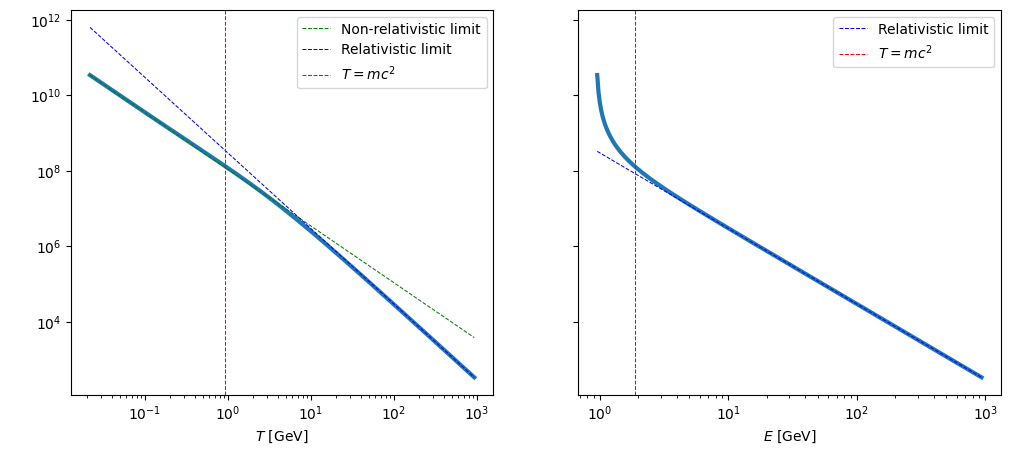

In [75]:
mc2 = const.m_p * const.c**2
lg_mc2 = np.log10(mc2.to(u.GeV).value)
E_grid = np.logspace(lg_mc2, 3 + lg_mc2, 300)[1:] * u.GeV
T_grid = E_grid - mc2
p_grid = np.sqrt(E_grid**2 - mc2**2) / const.c

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
ax_T = axes[0]
ax_E = axes[1]


dNdE = ((p_grid ** (2 - alpha)) * (E_grid / (p_grid * const.c**2))).value
ax_T.loglog(T_grid, dNdE, linewidth=3)
ax_E.loglog(E_grid, dNdE, linewidth=3)

kw = dict(
    linestyle="--",
    color="g",
    linewidth=0.75,
    label="Non-relativistic limit"
)
ax_T.loglog(T_grid, dNdE[0] * (T_grid / T_grid[0]) ** ((1 - alpha) / 2), **kw)

kw["color"] = "b"
kw["label"] = "Relativistic limit"
ax_T.loglog(T_grid, dNdE[-1] * (T_grid / T_grid[-1]) ** (2 - alpha), **kw)
ax_E.loglog(E_grid, dNdE[-1] * (E_grid / E_grid[-1]) ** (2 - alpha), **kw)

kw["color"] = "r"
kw["label"] = "$ T = mc^2 $"
ax_E.axvline(2 * mc2, **kw)
ax_T.axvline(mc2, **kw)

for ax_any in axes:
    ax_any.legend()

label_axes(ax_T, xlabel="T")
label_axes(ax_E, xlabel="E")
plt.show()